In [154]:
%matplotlib inline
import os
import sys
from ray.tune import Analysis
import numpy as np
import os
import sys
import json
import pickle
import pandas as pd
import matplotlib.pyplot as plt


# get an absolute path to the directory that contains parent files
project_dir = globals()['_dh'][0]
sys.path.append(os.path.normpath(os.path.join(project_dir, '..', '..')))

from experiments.utils.constants import TRAIN_RESULTS_PATH

In [155]:
# evaluation_infos = {
#     0: {
#         'series': 65,
#         'cluster_id': 13,
#         'legend': 'PG_balanced',
#         'experiment_id': 0,
#         'algorithm': 'PG',
#         'workload_id': 0,
#         # 'trial': 'PG_SimSchedulerEnv_f48b8_00000_0_2023-01-17_02-02-11'
#         },
#     1: {
#         'series': 65,
#         'cluster_id': 13,
#         'legend': 'PG_p',
#         'experiment_id': 1,
#         'algorithm': 'PG',
#         'workload_id': 0,
#         # 'trial': 'PG_SimSchedulerEnv_173d5_00000_0_2023-01-17_02-03-09'
#         },
#     2: {
#         'series': 65,
#         'cluster_id': 13,
#         'legend': 'PG_cv',
#         'experiment_id': 2,
#         'algorithm': 'PG',
#         'workload_id': 0,
#         # 'trial': 'PG_SimSchedulerEnv_2095d_00000_0_2023-01-17_02-03-25'
#         },
#     3: {
#         'series': 66,
#         'cluster_id': 13,
#         'legend': 'PPO_balanced',
#         'experiment_id': 0,
#         'algorithm': 'PPO',
#         'workload_id': 0,
#         # 'trial': 'PPO_SimSchedulerEnv_20a4f_00000_0_2023-01-17_02-10-35'
#         },
#     4: {
#         'series': 66,
#         'cluster_id': 13,
#         'legend': 'PPO_p',
#         'experiment_id': 1,
#         'algorithm': 'PPO',
#         'workload_id': 0,
#         # 'trial': 'PPO_SimSchedulerEnv_2939d_00000_0_2023-01-17_02-10-49'
#         },
#     5: {
#         'series': 66,
#         'cluster_id': 13,
#         'legend': 'PPO_cv',
#         'experiment_id': 2,
#         'algorithm': 'PPO',
#         'workload_id': 0,
#         # 'trial': 'PPO_SimSchedulerEnv_c352b_00000_0_2023-01-17_02-15-08'
#         },
#     6: {
#         'series': 67,
#         'cluster_id': 13,
#         'legend': 'IMPALA_balanced',
#         'experiment_id': 0,
#         'algorithm': 'IMPALA',
#         'workload_id': 0,
#         # 'trial': 'IMPALA_SimSchedulerEnv_46044_00000_0_2023-01-17_02-18-47'
#         },
#     7: {
#         'series': 67,
#         'cluster_id': 13,
#         'legend': 'IMPALA_cv',
#         'experiment_id': 1,
#         'algorithm': 'IMPALA',
#         'workload_id': 0,
#         # 'trial': 'IMPALA_SimSchedulerEnv_6e736_00000_0_2023-01-17_02-19-55'
#         },
#     8: {
#         'series': 67,
#         'cluster_id': 13,
#         'legend': 'IMPALA_p',
#         'experiment_id': 2,
#         'algorithm': 'IMPALA',
#         'workload_id': 0,
#         # 'trial': 'IMPALA_SimSchedulerEnv_b5696_00000_0_2023-01-17_02-21-54'
#         },
#     9: {
#         'series': 70,
#         'cluster_id': 13,
#         'legend': 'DQN_cv',
#         'experiment_id': 0,
#         'algorithm': 'DQN',
#         'workload_id': 0,
#         # 'trial': 'DQN_SimSchedulerEnv_4ae9d_00000_0_2023-01-26_19-19-02'
#         },
#     10: {
#         'series': 70,
#         'cluster_id': 13,
#         'legend': 'DQN_p',
#         'experiment_id': 1,
#         'algorithm': 'DQN',
#         'workload_id': 0,
#         # 'trial': 'DQN_SimSchedulerEnv_63d00_00000_0_2023-01-26_19-19-44'
#         },
#     11: {
#         'series': 70,
#         'cluster_id': 13,
#         'legend': 'DQN_balance',
#         'experiment_id': 2,
#         'algorithm': 'DQN',
#         'workload_id': 0,
#         # 'trial': 'DQN_SimSchedulerEnv_7c1e9_00000_0_2023-01-26_19-20-25'
#         },
# }
evaluation_infos = {
    0: {
        'series': 77,
        'cluster_id': 13,
        'legend': 'IMPALA_p',
        'experiment_id': 0,
        'algorithm': 'IMPALA',
        'workload_id': 0,
        # 'trial': 'PG_SimSchedulerEnv_f48b8_00000_0_2023-01-17_02-02-11'
        },
    1: {
        'series': 77,
        'cluster_id': 13,
        'legend': 'IMPALA_v',
        'experiment_id': 1,
        'algorithm': 'IMPALA',
        'workload_id': 0,
        # 'trial': 'PG_SimSchedulerEnv_173d5_00000_0_2023-01-17_02-03-09'
        },
    2: {
        'series': 77,
        'cluster_id': 13,
        'legend': 'IMPALA_balance',
        'experiment_id': 2,
        'algorithm': 'IMPALA',
        'workload_id': 0,
        # 'trial': 'PG_SimSchedulerEnv_2095d_00000_0_2023-01-17_02-03-25'
        },
    3: {
        'series': 78,
        'cluster_id': 13,
        'legend': 'PG_p',
        'experiment_id': 0,
        'algorithm': 'PG',
        'workload_id': 0,
        # 'trial': 'PG_SimSchedulerEnv_f48b8_00000_0_2023-01-17_02-02-11'
        },
    4: {
        'series': 78,
        'cluster_id': 13,
        'legend': 'PG_v',
        'experiment_id': 1,
        'algorithm': 'PG',
        'workload_id': 0,
        # 'trial': 'PG_SimSchedulerEnv_173d5_00000_0_2023-01-17_02-03-09'
        },
    5: {
        'series': 78,
        'cluster_id': 13,
        'legend': 'PG_balance',
        'experiment_id': 2,
        'algorithm': 'PG',
        'workload_id': 0,
        # 'trial': 'PG_SimSchedulerEnv_2095d_00000_0_2023-01-17_02-03-25'
        },
    6: {
        'series': 79,
        'cluster_id': 13,
        'legend': 'PPO_p',
        'experiment_id': 0,
        'algorithm': 'PPO',
        'workload_id': 0,
        # 'trial': 'IMPALA_SimSchedulerEnv_46044_00000_0_2023-01-17_02-18-47'
        },
    7: {
        'series': 79,
        'cluster_id': 13,
        'legend': 'PPO_v',
        'experiment_id': 1,
        'algorithm': 'PPO',
        'workload_id': 0,
        # 'trial': 'IMPALA_SimSchedulerEnv_6e736_00000_0_2023-01-17_02-19-55'
        },
    8: {
        'series': 79,
        'cluster_id': 13,
        'legend': 'PPO_balance',
        'experiment_id': 2,
        'algorithm': 'PPO',
        'workload_id': 0,
        # 'trial': 'IMPALA_SimSchedulerEnv_b5696_00000_0_2023-01-17_02-21-54'
        },
    9: {
        'series': 76,
        'cluster_id': 13,
        'legend': 'DQN_p',
        'experiment_id': 0,
        'algorithm': 'DQN',
        'workload_id': 0,
        # 'trial': 'IMPALA_SimSchedulerEnv_46044_00000_0_2023-01-17_02-18-47'
        },
    10: {
        'series': 76,
        'cluster_id': 13,
        'legend': 'DQN_v',
        'experiment_id': 1,
        'algorithm': 'DQN',
        'workload_id': 0,
        # 'trial': 'IMPALA_SimSchedulerEnv_6e736_00000_0_2023-01-17_02-19-55'
        },
    11: {
        'series': 76,
        'cluster_id': 13,
        'legend': 'DQN_balance',
        'experiment_id': 2,
        'algorithm': 'DQN',
        'workload_id': 0,
        # 'trial': 'IMPALA_SimSchedulerEnv_b5696_00000_0_2023-01-17_02-21-54'
        },
    # 9: {
    #     'series': 70,
    #     'cluster_id': 13,
    #     'legend': 'DQN_cv',
    #     'experiment_id': 0,
    #     'algorithm': 'DQN',
    #     'workload_id': 0,
    #     # 'trial': 'DQN_SimSchedulerEnv_4ae9d_00000_0_2023-01-26_19-19-02'
    #     },
    # 10: {
    #     'series': 70,
    #     'cluster_id': 13,
    #     'legend': 'DQN_p',
    #     'experiment_id': 1,
    #     'algorithm': 'DQN',
    #     'workload_id': 0,
    #     # 'trial': 'DQN_SimSchedulerEnv_63d00_00000_0_2023-01-26_19-19-44'
    #     },
    # 11: {
    #     'series': 70,
    #     'cluster_id': 13,
    #     'legend': 'DQN_balance',
    #     'experiment_id': 2,
    #     'algorithm': 'DQN',
    #     'workload_id': 0,
    #     # 'trial': 'DQN_SimSchedulerEnv_7c1e9_00000_0_2023-01-26_19-20-25'
    #     },
}

In [177]:
def load_experiments(series, cluster_id, legend, experiment_id, workload_id, algorithm):
    experiment_folder_path = os.path.join(
        TRAIN_RESULTS_PATH,
        "series",      str(series),
        "envs",        'sim-scheduler',
        "clusters",    str(cluster_id),
        "workloads",   str(workload_id),
        "experiments", str(experiment_id),
        str(algorithm))
    trial = [ name for name in os.listdir(experiment_folder_path) if os.path.isdir(os.path.join(experiment_folder_path, name)) ][0]
    experiment_folder_path = os.path.join(experiment_folder_path, trial)
    analysis = Analysis(experiment_folder_path)
    df = analysis.trial_dataframes[experiment_folder_path]
    with open(
        os.path.join(
            experiment_folder_path, 'result.json'), 'r') as f:
        result = f.read().split('\n')
    # episodes_reward = pd.DataFrame({'timestep':[], 'reward':[]})
    experiment_json = {}
    # TODO also load the df and do from scrath with the goal of replicating the tensorboard results
    for line, iteration in enumerate(result):
        if iteration != '':
            experiment_json[line] = json.loads(iteration)
    # replace rewards with new ones
    selected_stats = [
        'episode_reward_mean',
        # 'episodes_this_iter',
        'timesteps_total',
        # 'custom_metrics/scheduling_timestep_avg_mean',
        # 'custom_metrics/scheduling_success_avg_mean',
        'custom_metrics/num_consolidated_avg_mean',
        # 'custom_metrics/num_overloaded_avg_mean',
        # 'custom_metrics/time_mean',
        'custom_metrics/timestep_episode_mean',
        # 'custom_metrics/reward_u_mean',
        'custom_metrics/reward_cv_mean',
        # 'custom_metrics/reward_v_mean',
        # 'custom_metrics/reward_g_mean',
        'custom_metrics/reward_p_mean',
        'time_total_s']
    experiment_df = df[selected_stats]
    return legend, cluster_id, experiment_df, experiment_json


experiments_df = {}
experiments_json = {}
# episodes_rewards = []
for evaluation_id, evaluation_info in evaluation_infos.items():
    legend, cluster_id, experiment_df, experiment_json = load_experiments(**evaluation_info)
    experiments_json[evaluation_id] = experiment_json
    experiments_df[evaluation_id] = experiment_df

In [ ]:
len(experiments_df)

12

In [157]:
experiment_id = 1
dataframe = 'custom_metrics/num_consolidated_avg_mean'
dataframe = experiments_df[experiment_id]


# Training Reward

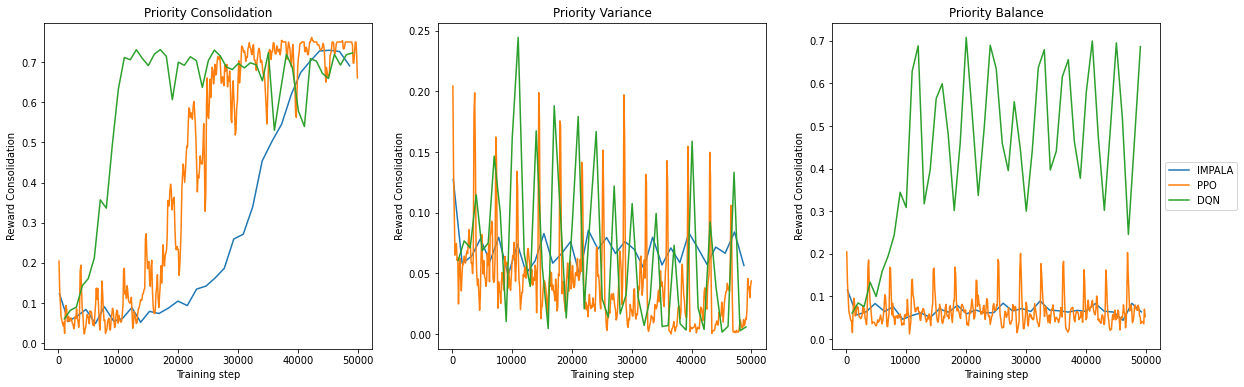

In [158]:
reward = 'custom_metrics/reward_p_mean'
data = {
    'Priority Consolidation' : {
        'IMPALA': {
            'metric': experiments_df[0][reward].tolist(),
            'timesteps': experiments_df[0]['timesteps_total'].tolist()
            },
        # 'PG': {
        #     'metric': experiments_df[3][reward].tolist(),
        #     'timesteps': experiments_df[3]['timesteps_total'].tolist()
        #     },
        'PPO': {
            'metric': experiments_df[6][reward].tolist(),
            'timesteps': experiments_df[6]['timesteps_total'].tolist()
            },
        'DQN': {
            'metric': experiments_df[9][reward].tolist(),
            'timesteps': experiments_df[9]['timesteps_total'].tolist()
            },
        },
    'Priority Variance' : {
        'IMPALA': {
            'metric': experiments_df[1][reward].tolist(),
            'timesteps': experiments_df[1]['timesteps_total'].tolist()
            },
        # 'PG': {
        #     'metric': experiments_df[4][reward].tolist(),
        #     'timesteps': experiments_df[4]['timesteps_total'].tolist()
        #     },
        'PPO': {
            'metric': experiments_df[7][reward].tolist(),
            'timesteps': experiments_df[7]['timesteps_total'].tolist()
            },
        'DQN': {
            'metric': experiments_df[10][reward].tolist(),
            'timesteps': experiments_df[10]['timesteps_total'].tolist()
            },
        },
    'Priority Balance' : {
        'IMPALA': {
            'metric': experiments_df[2][reward].tolist(),
            'timesteps': experiments_df[2]['timesteps_total'].tolist()
            },
        # 'PG': {
        #     'metric': experiments_df[5][reward].tolist(),
        #     'timesteps': experiments_df[5]['timesteps_total'].tolist()
        #     },
        'PPO': {
            'metric': experiments_df[8][reward].tolist(),
            'timesteps': experiments_df[8]['timesteps_total'].tolist()
            },
        'DQN': {
            'metric': experiments_df[11][reward].tolist(),
            'timesteps': experiments_df[11]['timesteps_total'].tolist()
            },
        }
}

fig, axes = plt.subplots(1, 3, figsize=(20, 6))
for ax, d in zip(axes, data.items()):
    priority = d[0]
    plot_data = d[1]
    for key in plot_data:
        to_select_timesteps = 50000
        timesteps = np.array(plot_data[key]['timesteps'])
        timesteps = timesteps[timesteps<to_select_timesteps]
        length = len(timesteps)
        metric = np.array(plot_data[key]['metric'])
        metric = metric[0:length]
        ax.plot(timesteps, metric, label=key)
    ax.set_title(priority)
    ax.set(xlabel='Training step', ylabel='Reward Consolidation')
    # ax.set_ylim([0,1])
    # Add a legend and show the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()


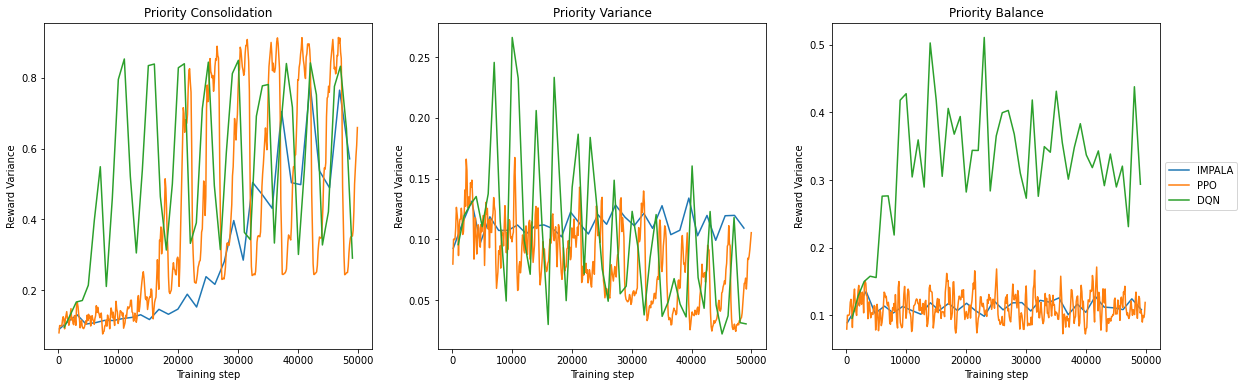

In [153]:
reward = 'custom_metrics/reward_cv_mean'
data = {
    'Priority Consolidation' : {
        'IMPALA': {
            'metric': experiments_df[0][reward].tolist(),
            'timesteps': experiments_df[0]['timesteps_total'].tolist()
            },
        # 'PG': {
        #     'metric': experiments_df[3][reward].tolist(),
        #     'timesteps': experiments_df[3]['timesteps_total'].tolist()
        #     },
        'PPO': {
            'metric': experiments_df[6][reward].tolist(),
            'timesteps': experiments_df[6]['timesteps_total'].tolist()
            },
        'DQN': {
            'metric': experiments_df[9][reward].tolist(),
            'timesteps': experiments_df[9]['timesteps_total'].tolist()
            },
        },
    'Priority Variance' : {
        'IMPALA': {
            'metric': experiments_df[1][reward].tolist(),
            'timesteps': experiments_df[1]['timesteps_total'].tolist()
            },
        # 'PG': {
        #     'metric': experiments_df[4][reward].tolist(),
        #     'timesteps': experiments_df[4]['timesteps_total'].tolist()
        #     },
        'PPO': {
            'metric': experiments_df[7][reward].tolist(),
            'timesteps': experiments_df[7]['timesteps_total'].tolist()
            },
        'DQN': {
            'metric': experiments_df[10][reward].tolist(),
            'timesteps': experiments_df[10]['timesteps_total'].tolist()
            },
        },
    'Priority Balance' : {
        'IMPALA': {
            'metric': experiments_df[2][reward].tolist(),
            'timesteps': experiments_df[2]['timesteps_total'].tolist()
            },
        # 'PG': {
        #     'metric': experiments_df[5][reward].tolist(),
        #     'timesteps': experiments_df[5]['timesteps_total'].tolist()
        #     },
        'PPO': {
            'metric': experiments_df[8][reward].tolist(),
            'timesteps': experiments_df[8]['timesteps_total'].tolist()
            },
        'DQN': {
            'metric': experiments_df[11][reward].tolist(),
            'timesteps': experiments_df[11]['timesteps_total'].tolist()
            },
        }
}

fig, axes = plt.subplots(1, 3, figsize=(20, 6))
for ax, d in zip(axes, data.items()):
    priority = d[0]
    plot_data = d[1]
    for key in plot_data:
        to_select_timesteps = 50000
        timesteps = np.array(plot_data[key]['timesteps'])
        timesteps = timesteps[timesteps<to_select_timesteps]
        length = len(timesteps)
        metric = np.array(plot_data[key]['metric'])
        metric = metric[0:length]
        ax.plot(timesteps, metric, label=key)
    ax.set_title(priority)
    ax.set(xlabel='Training step', ylabel='Reward Variance')
    # ax.set_ylim([0,1])
    # Add a legend and show the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig('training-v.pdf')

plt.show()


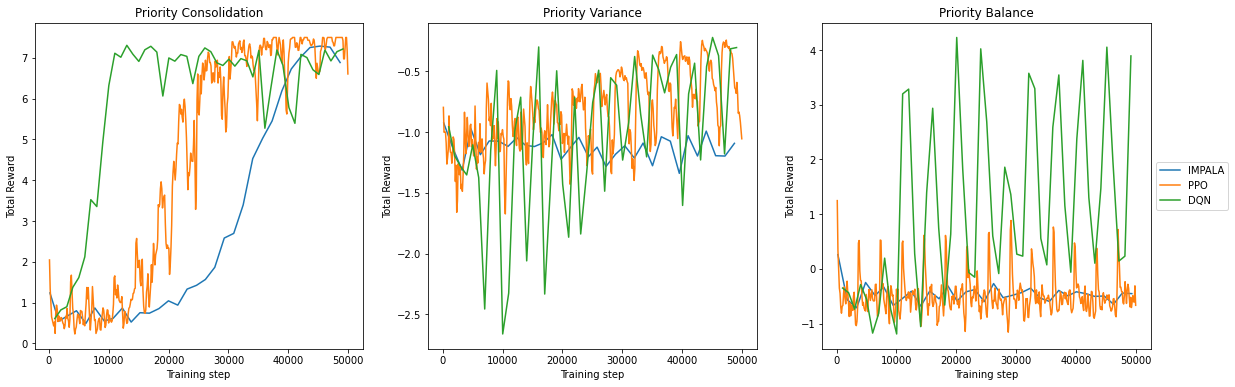

In [150]:
reward = 'episode_reward_mean'
# reward = 'custom_metrics/reward_p_mean'
data = {
    'Priority Consolidation' : {
        'IMPALA': {
            'metric': experiments_df[0][reward].tolist(),
            'timesteps': experiments_df[0]['timesteps_total'].tolist()
            },
        # 'PG': {
        #     'metric': experiments_df[3][reward].tolist(),
        #     'timesteps': experiments_df[3]['timesteps_total'].tolist()
        #     },
        'PPO': {
            'metric': experiments_df[6][reward].tolist(),
            'timesteps': experiments_df[6]['timesteps_total'].tolist()
            },
        'DQN': {
            'metric': experiments_df[9][reward].tolist(),
            'timesteps': experiments_df[9]['timesteps_total'].tolist()
            },
        },
    'Priority Variance' : {
        'IMPALA': {
            'metric': experiments_df[1][reward].tolist(),
            'timesteps': experiments_df[1]['timesteps_total'].tolist()
            },
        # 'PG': {
        #     'metric': experiments_df[4][reward].tolist(),
        #     'timesteps': experiments_df[4]['timesteps_total'].tolist()
        #     },
        'PPO': {
            'metric': experiments_df[7][reward].tolist(),
            'timesteps': experiments_df[7]['timesteps_total'].tolist()
            },
        'DQN': {
            'metric': experiments_df[10][reward].tolist(),
            'timesteps': experiments_df[10]['timesteps_total'].tolist()
            },
        },
    'Priority Balance' : {
        'IMPALA': {
            'metric': experiments_df[2][reward].tolist(),
            'timesteps': experiments_df[2]['timesteps_total'].tolist()
            },
        # 'PG': {
        #     'metric': experiments_df[5][reward].tolist(),
        #     'timesteps': experiments_df[5]['timesteps_total'].tolist()
        #     },
        'PPO': {
            'metric': experiments_df[8][reward].tolist(),
            'timesteps': experiments_df[8]['timesteps_total'].tolist()
            },
        'DQN': {
            'metric': experiments_df[11][reward].tolist(),
            'timesteps': experiments_df[11]['timesteps_total'].tolist()
            },
        }
}

fig, axes = plt.subplots(1, 3, figsize=(20, 6))
for ax, d in zip(axes, data.items()):
    priority = d[0]
    plot_data = d[1]
    for key in plot_data:
        to_select_timesteps = 50000
        timesteps = np.array(plot_data[key]['timesteps'])
        timesteps = timesteps[timesteps<to_select_timesteps]
        length = len(timesteps)
        metric = np.array(plot_data[key]['metric'])
        metric = metric[0:length]
        ax.plot(timesteps, metric, label=key)
    ax.set_title(priority)
    ax.set(xlabel='Training step', ylabel='Total Reward')
    # ax.set_ylim([0,1])
    # Add a legend and show the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.suptitle('Total Reward')
plt.savefig('training-reward.pdf')
plt.show()

In [173]:
len(experiments_df)

12

In [174]:
evaluation_infos

{0: {'series': 77,
  'cluster_id': 13,
  'legend': 'IMPALA_p',
  'experiment_id': 0,
  'algorithm': 'IMPALA',
  'workload_id': 0},
 1: {'series': 77,
  'cluster_id': 13,
  'legend': 'IMPALA_v',
  'experiment_id': 1,
  'algorithm': 'IMPALA',
  'workload_id': 0},
 2: {'series': 77,
  'cluster_id': 13,
  'legend': 'IMPALA_balance',
  'experiment_id': 2,
  'algorithm': 'IMPALA',
  'workload_id': 0},
 3: {'series': 78,
  'cluster_id': 13,
  'legend': 'PG_p',
  'experiment_id': 0,
  'algorithm': 'PG',
  'workload_id': 0},
 4: {'series': 78,
  'cluster_id': 13,
  'legend': 'PG_v',
  'experiment_id': 1,
  'algorithm': 'PG',
  'workload_id': 0},
 5: {'series': 78,
  'cluster_id': 13,
  'legend': 'PG_balance',
  'experiment_id': 2,
  'algorithm': 'PG',
  'workload_id': 0},
 6: {'series': 79,
  'cluster_id': 13,
  'legend': 'PPO_p',
  'experiment_id': 0,
  'algorithm': 'PPO',
  'workload_id': 0},
 7: {'series': 79,
  'cluster_id': 13,
  'legend': 'PPO_v',
  'experiment_id': 1,
  'algorithm': 'PPO

In [176]:
# extract running time of algorithms
algorithms_times = {'PG': [], 'IMPALA': [], 'DQN': [], 'PPO': []}
for experiment_id, info in evaluation_infos.items():
    algorithm = info['algorithm']
    time_s = experiments_df[experiment_id]['time_total_s'].tolist()[-1]
    algorithms_times[algorithm].append(time_s)
algorithms_times

{'PG': [1364.6273655891418, 1362.8226130008698, 1334.4433562755585],
 'IMPALA': [1279.761099100113, 1351.5301823616028, 1330.3462438583374],
 'DQN': [3744.436828136444, 3283.7071862220764, 3202.6894116401672],
 'PPO': [1544.1101536750791, 1636.58038854599, 1581.627545595169]}